In [181]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import re

# setup plot setting
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 14})

In [182]:
# import and inspect dataset
data = pd.read_csv("30k_seek_australia_2019.csv", encoding='utf-8')
# dataset extracted from "30000 job postings from SEEK Australia" by PROMPTCLOUD, 2019 
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
category           30000 non-null object
city               30000 non-null object
company_name       30000 non-null object
geo                30000 non-null object
job_board          30000 non-null object
job_description    29655 non-null object
job_title          30000 non-null object
job_type           30000 non-null object
post_date          30000 non-null object
salary_offered     8952 non-null object
state              19180 non-null object
url                30000 non-null object
dtypes: object(12)
memory usage: 2.7+ MB
None


,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


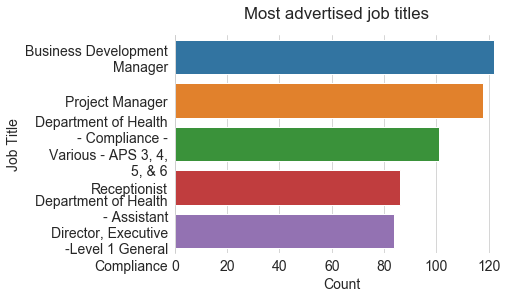

In [183]:
# most advertised job title
job_title = data.groupby('job_title').agg({'category':'count'})
job_title.reset_index(inplace=True)
# replace special character UTF-8 character
job_title.loc[:,'job_title'] = job_title.job_title.str.replace('â€“','-')
job_title.columns = ['job_title','count']
job_title.sort_values(['count'],ascending=False,inplace=True)
job_title.reset_index(drop=True,inplace=True)

# display bar chart of most advertised job titles
job_title_top = job_title.head().copy()
wraped_titles = job_title_top.job_title.map(lambda x:"\n".join(wrap(x, width=20)))
job_title_top.loc[:,'job_title'] = wraped_titles
fig,ax = plt.subplots()
sns.barplot(x='count', y='job_title', data=job_title_top)
ax.set(xlabel='Count',ylabel='Job Title')
fig.suptitle('Most advertised job titles')
sns.despine(bottom=True)
plt.show()

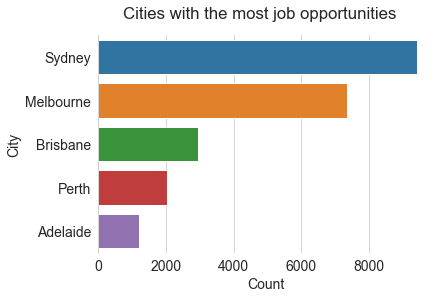

In [184]:
# most advertising city
job_city = data.groupby('city').agg({'category':'count'})
job_city.reset_index(inplace=True)
job_city.columns = ['city','count']
job_city.sort_values(['count'],ascending=False,inplace=True)
job_city.reset_index(drop=True,inplace=True)

# display bar chart of most advertising in cities
fig,ax = plt.subplots()
sns.barplot(x='count', y='city', data=job_city.head())
ax.set(xlabel='Count',ylabel='City')
fig.suptitle('Cities with the most job opportunities')
sns.despine(bottom=True)
plt.show()

In [185]:
# jobs related to data science
ds_roles = ['Data Scientist','Data Analyst','Data Engineer','Data Architect','Statistician','Database Administrator']
# job titles extracted from "The different data science roles in the industry," by M. Theuwissen, 2015
def does_contain(x,li):
    for y in li:
        if y.lower() in x.lower():
            return True
    return False    
ds_related = data.loc[data.job_title.map(lambda x: does_contain(x,ds_roles))].copy()
ds_related.reset_index(drop=True,inplace=True)
ds_related.tail()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
109,Marketing & Communications,"Newcastle, Maitland & Hunter",WesTrac Pty Ltd,AU,seek,About the Role We are currently seeking a res...,Graduate Data Scientist,Full Time,2018-04-11T01:50:14Z,NaN,NaN,https://www.seek.com.au/job/35956039
110,Healthcare & Medical,Adelaide,University of South Australia,AU,seek,"Located at SAHMRI, North Terrace, Adelaide CB...",Statistician,Contract/Temp,2018-04-11T02:01:17Z,"Salary range: $85,680 - $114,967 per annum",NaN,https://www.seek.com.au/job/35956276
111,Sales,"Newcastle, Maitland & Hunter",WesTrac Pty Ltd,AU,seek,About the Role We are currently seeking a res...,Graduate Data Scientist,Full Time,2018-04-11T01:50:14Z,NaN,NaN,https://www.seek.com.au/job/35956040
112,Information & Communication Technology,Sydney,The University of Sydney,AU,seek,Student Experience and Data Analyst Faculty of...,Student Experience and Data Analyst,Full Time,2018-04-11T02:30:36Z,NaN,"CBD, Inner West & Eastern Suburbs",https://www.seek.com.au/job/35956778
113,Consulting & Strategy,Sydney,Correlate Resources,AU,seek,Our client is an industry pioneering Customer ...,Customer Analytics Lead / Lead Data Scientist ...,Contract/Temp,2018-04-11T01:30:40Z,Competitive Daily Rates,"CBD, Inner West & Eastern Suburbs",https://www.seek.com.au/job/35955669


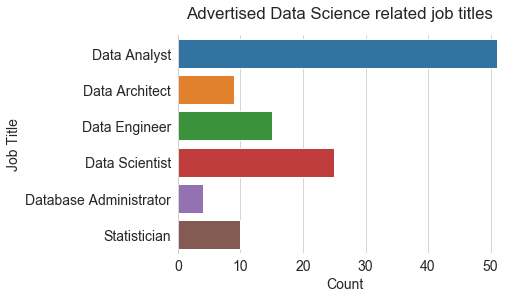

In [186]:
# simplify job titles 
def simplify_title(x,li):
    for y in li:
        if y.lower() in x.lower():
            return y
ds_related['job_title'] = ds_related.job_title.map(lambda x: simplify_title(x,ds_roles))

# display occurance of data science related jobs
ds_related_count = ds_related.groupby('job_title').agg('count')
ds_related_count.reset_index(inplace=True)
fig,ax = plt.subplots()
sns.barplot(x='category', y='job_title', data=ds_related_count)
ax.set(xlabel='Count',ylabel='Job Title')
fig.suptitle('Advertised Data Science related job titles')
sns.despine(bottom=True)
plt.show()

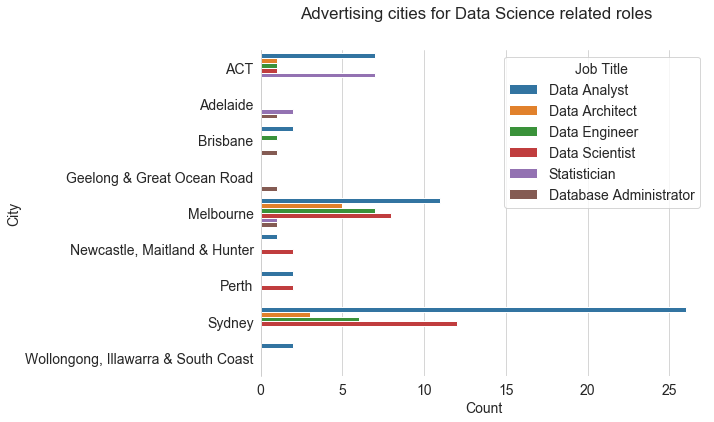

In [187]:
# display occurance of data science related jobs from each city
df = ds_related.groupby(['city','job_title']).agg('count')
df.reset_index(inplace=True)
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x='category',y='city',hue='job_title',data=df)
ax.set(xlabel='Count',ylabel='City')
ax.legend(title='Job Title')
fig.suptitle('Advertising cities for Data Science related roles')
sns.despine(bottom=True)
plt.show()

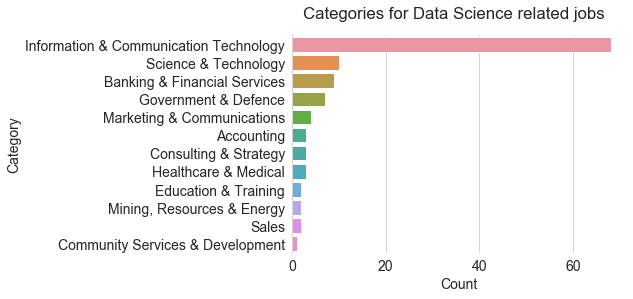

In [201]:
# advertisements for Data Science related roles in each category
ds_category = ds_related.groupby('category').agg({'city':'count'})
ds_category.sort_values(by='city',ascending=False,inplace=True)
ds_category.reset_index(inplace=True)

fig,ax = plt.subplots()
sns.barplot(x='city',y='category',data=ds_category)
ax.set(xlabel='Count',ylabel='Category')
fig.suptitle('Categories for Data Science related jobs')
sns.despine(bottom=True)
plt.show()

In [189]:
# Data Science related role salaries
ds_related.loc[~ds_related.salary_offered.isna()].salary_offered.unique()

array(['$80000 - $100000 per annum', '$100000.00 - $120000.00 p.a.',
       '$100,502 - $114,624', '$108,255 - $123,411',
       '$120,000 - $189,999 + super', 'Attractive Salary!!',
       '$100,000 - $140,000 plus Superannuation ',
       '$350 - $600 p.d. + super', '$140k - $160k p.a. + super + bonus ',
       '$70-80k pa', 'Contract with view to go Perm + End User + Parking',
       'Attractive Remuneration', 'Competitive',
       '$526.00 - $553.00 + super / day',
       'Salary negotiable upon experience', '$100,000 ',
       '3 months contract likely to extend', '$800 - $850 p.d.',
       'Competitive Salary + Benefits',
       'Salary range: $85,680 - $114,967 per annum', 'Good hourly rate',
       '$105k - $110k p.a. + Super', '100 - 120k Base + super and bonus',
       'Base Salary plus Super and Bonus', '$120,000 - $169,999 + super',
       'plus super ', 'Competitive Salary Package',
       '$69,000 + Superannuation and Salary Packaging',
       'Up to $150k p.a.', '$90k - 

In [190]:
# convert salary entries to a valid salary
def conv_salary(salary):
    if type(salary) == str:
        # note per day salary
        if ('day' in salary) or ('p.d.' in salary):
            day = 1
        else:
            day = 0
        # remove strings except few characters
        for char in salary:
            if ~char.isdigit() & (char not in ['k','.','-',' ']):
                salary = salary.replace(char,'')
        # note k 
        if ('k' in salary) & (' k' not in salary):
            k = 1
        else:
            k = 0
        salary = salary.replace('k','')
        # remove space
        salary = salary.replace(' ','')
        # convert an empty string or short string into None
        if (len(salary) < 3):
            salary = None
            return salary
        # remove .. at the end
        salary = salary.strip('..')
        # find average for salary range
        if '-' in salary:
            salary = np.array(salary.split('-'))
            salary = salary.astype('float').mean()
        else:
            salary = float(salary)
        # covert per day to per annum salary
        if day == 1:
            salary = salary * 250  # assuming 250 working days in a year
        # convert k to thousand
        if k == 1:
            salary = salary * 1000
    else:
        salary = None

    return salary

salaries = ds_related.salary_offered.map(lambda x: conv_salary(x))
ds_related.salary_offered = salaries
ds_related.salary_offered.unique()

array([ 90000. , 110000. , 107563. ,      nan, 115833. , 154999.5,
       120000. , 118750. , 150000. ,  75000. , 134875. , 100000. ,
       206250. , 100323.5, 107500. , 144999.5,  69000. , 105000. ])

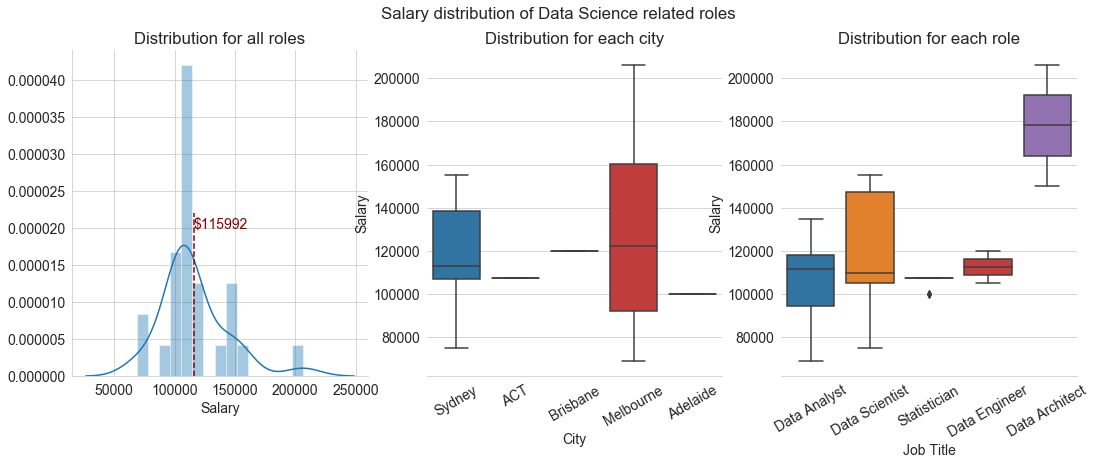

In [202]:
# salary distribution for Data Science related roles
ds_salary = ds_related.loc[~ds_related.salary_offered.isna()].copy()

fig,ax = plt.subplots(1,3,figsize=(18,6))
sns.distplot(ds_salary.salary_offered,ax=ax[0])
sns.boxplot(x='city',y='salary_offered',data=ds_salary,ax=ax[1])
sns.boxplot(x='job_title',y='salary_offered',data=ds_salary,ax=ax[2])
ax[0].set(title='Distribution for all roles', xlabel='Salary')
# mean line
mean_sal = int(ds_salary.salary_offered.mean())
ax[0].axvline(mean_sal,0,0.5,ls='--',c='darkred')
ax[0].text(mean_sal,0.00002,'${}'.format(mean_sal),c='darkred')
ax[1].set(title='Distribution for each city', xlabel='City', ylabel='Salary')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=30)
ax[2].set(title='Distribution for each role', xlabel='Job Title', ylabel='Salary')
ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation=30)
fig.suptitle('Salary distribution of Data Science related roles')
sns.despine(ax=ax[0])
sns.despine(ax=ax[1],left=True)
sns.despine(ax=ax[2],left=True)
plt.show()

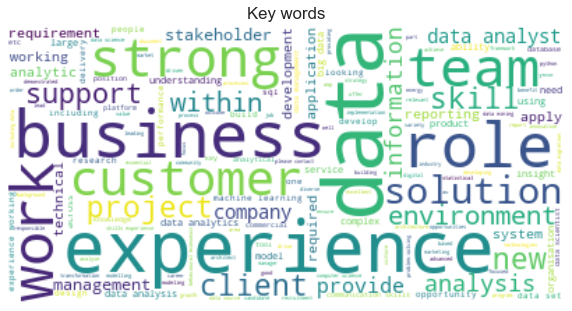

In [192]:
# key words in job descriptions
# combine job description
keys = ds_related.job_description.tolist()
keys = ",".join(str(key).lower() for key in keys)

# generate word cloud 
stop_words = set(STOPWORDS)|set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words,background_color="white").generate(keys)
fig,ax = plt.subplots(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
ax.set(title='Key words')
plt.axis('off')
plt.show()

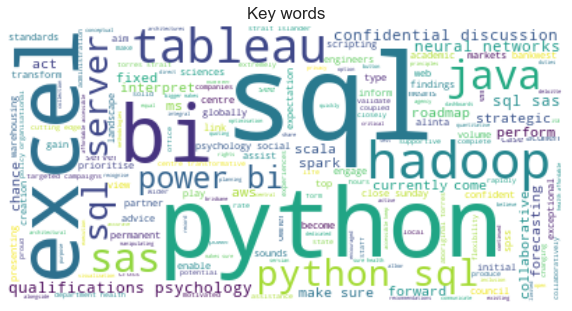

In [193]:
# filtering out frequently appearing non-technical skill terms
file_handler = open('stopword.txt', encoding='utf-8')
add_stop_words = file_handler.readline()
add_stop_words = set(add_stop_words.split(','))
stop_words = set(STOPWORDS)|set(stopwords.words('english'))|add_stop_words
# additional filtering
keys = keys.replace('australia','').replace('health care','').replace('oracle','').replace('powerbi','power bi').replace('capacity','').replace('adobe','').replace('microsoft','')
wordcloud = WordCloud(stopwords=stop_words,background_color="white").generate(keys)
fig,ax = plt.subplots(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
ax.set(title='Key words')
plt.axis('off')
plt.show()

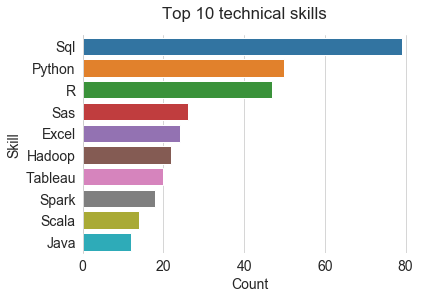

In [194]:
# most frequent technical skill terms
# technical skill terms attained from the wordcloud above
# r programming is added presuming wordcloud wasn't able to pick up
skills = ['power bi','excel','sql','python','tableau','hadoop','sas','java','spark','scala','spss','r']

# function to count frequency of skills
def count_skill(text,skill):
    count = len(re.findall(r'(?:\s|:|/|,|\.|-|\'|\"|;|&|\(|\[|\{{|^)({})(?:\s|:|/|,|\.|-|\'|\"|;|&|\)|\]|\}})'.format(skill),text))
    return count

# function to capitalize tokens made of multiple words
def capitalize_multi_word(word):
    if ' ' in word:
        i = word.index(' ')
        character = word[i+1].upper()
        word = word[:i+1] + character + word[i+2:]
    return word

skill_count = dict()
for skill in skills:
    skill_count[skill] = count_skill(keys,skill)
freq_skill = pd.DataFrame(skill_count.items(),columns=['Skill','Count'])
freq_skill.sort_values('Count',ascending=False,inplace=True)
freq_skill.reset_index(drop=True,inplace=True)
freq_skill.Skill = freq_skill.Skill.apply(lambda x: x.capitalize())
freq_skill.Skill = freq_skill.Skill.map(lambda x: capitalize_multi_word(x))

# disply top 10 technical skills
fig,ax = plt.subplots()
sns.barplot(x='Count',y='Skill',data=freq_skill.iloc[:10,:])
fig.suptitle('Top 10 technical skills')
sns.despine(bottom=True)
plt.show()

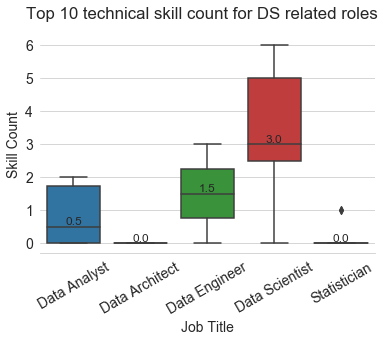

In [195]:
# average number of top 10 technical skills held by each Data Science related role
top_10_skill = freq_skill.Skill[:10].tolist()

# count top 10 skills for each DS related job
def count_top_10_skill(text,skillset):
    count = 0 
    for skill in skillset:
        count += count_skill(text,skill)
    return count

ds_salary['top_skill_count'] = ds_salary.job_description.map(lambda x: count_top_10_skill(x,top_10_skill))

# display boxplot of top 10 technical skill count for Data Science related roles
fig,ax = plt.subplots()
sns.boxplot(x='job_title',y='top_skill_count',data=ds_salary,order=ds_salary.groupby('job_title').first().reset_index().iloc[:,0])
fig.suptitle('Top 10 technical skill count for DS related roles')
ax.set(ylabel='Skill Count', xlabel='Job Title')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
median_skill = ds_salary.groupby('job_title').agg('median').copy()
for i in range(5):
    ax.text(i,median_skill.iloc[i,1],median_skill.iloc[i,1],ha='center',va='bottom',fontsize=12)
sns.despine(left=True)
plt.show()

## Reference

- PROMPTCLOUD. (2019). "<i>30000 job postings from SEEK Australia</i>". data.world. Retrieved from:<br>
https://data.world/promptcloud/30000-job-postings-from-seek-australia<br>
- Theuwissen, M. (2015). "<i>The different data science roles in the industry</i>". KDnuggets. Retrieved from:<br> https://www.kdnuggets.com/2015/11/different-data-science-roles-industry.html<br>